{'DESCR': 'mldata.org dataset: mnist-original', 'COL_NAMES': ['label', 'data'], 'target': array([0., 0., 0., ..., 9., 9., 9.]), 'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}
(70000, 784) (70000,)


C:\Users\dlwor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\dlwor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


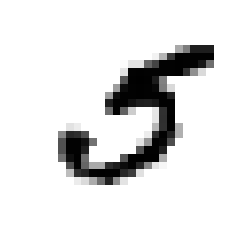

5.0
0.9384
0.96185
0.96705
[0.9384  0.96185 0.96705]
[0.91175 0.9087  0.9085 ]
[[53197  1382]
 [ 1272  4149]]
[[53726   853]
 [  957  4464]]
0.7501355993491231
0.7653569452130603
0.7576698319941564
[63926.06638177]
[ True]
[False]


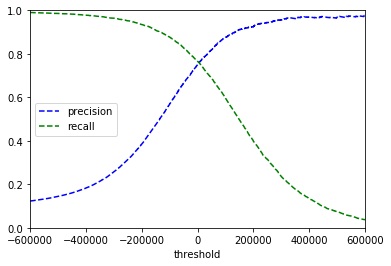

0.8464302827024437
0.6517247740269323


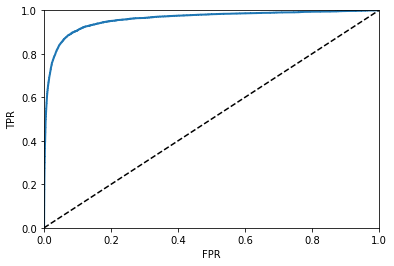

0.9597953659532407


C:\Users\dlwor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dlwor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dlwor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


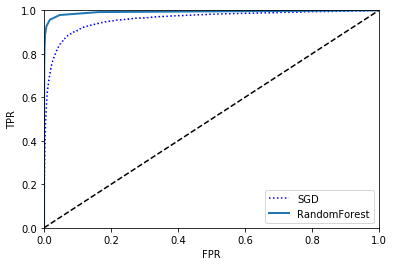

0.9924403094507258
[[-181929.43049077 -539073.75083939 -382488.18924598 -134366.08121533
  -396156.73551394   63926.06638177 -584456.05688141 -333258.62325201
  -638000.73189983 -742054.38255177]]
5
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
5.0
[5.]
45


C:\Users\dlwor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[5.]
[[0.  0.  0.  0.2 0.  0.8 0.  0.  0.  0. ]]
[0.84173165 0.82324116 0.83357504]
[0.90786843 0.90919546 0.91088663]
[[5727    2   25   11   10   52   47    9   36    4]
 [   1 6474   43   27    5   44    9   11  115   13]
 [  51   39 5301  123   78   22  102   58  170   14]
 [  42   40  140 5378    2  210   33   60  133   93]
 [  17   25   38    9 5391    9   53   33   75  192]
 [  68   40   32  202   69 4590  116   26  175  103]
 [  27   24   44    2   41   96 5634    7   43    0]
 [  22   20   66   32   52   10    5 5818   12  228]
 [  51  154   67  174   13  161   55   30 5003  143]
 [  41   35   28   93  181   32    2  222   72 5243]]


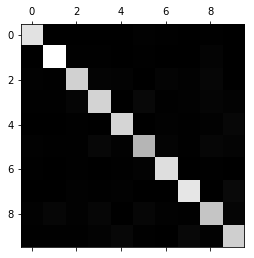

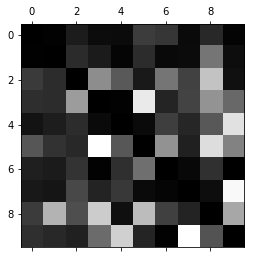

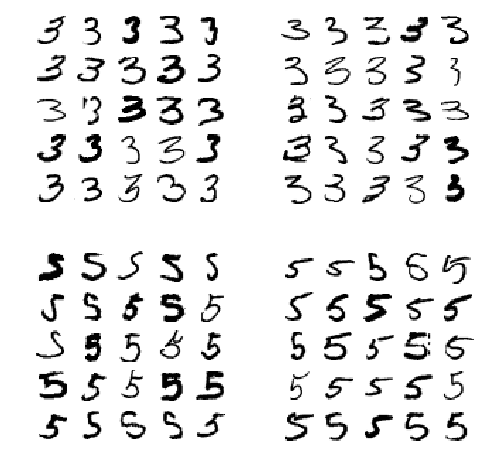

[[False  True]]


C:\Users\dlwor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0.9769514176379768


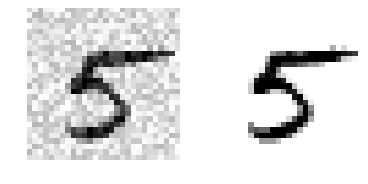

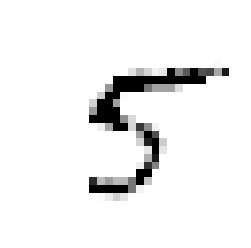

In [3]:
# 작성자 : 이민우
# 작성일 : 20181107
# 프로그램 설명 : 머신러닝 프로그램(분류)
# 사용 데이터셋 : MNIST
import os
import urllib.request
from sklearn.datasets import fetch_mldata # 데이터 가져올때 
import matplotlib
import matplotlib.pyplot as plt # 이미지 확인 
import numpy as np
from sklearn.linear_model import  SGDClassifier# 확률적 경사 하강법
from sklearn.model_selection import StratifiedKFold # 교차검증 때
from sklearn.base import clone# 교차검증 때
from sklearn.model_selection import  cross_val_score
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score # 정밀도와 재현률
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier # 다중 레이블 분류

    
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1],"b--", label="precision")
    plt.plot(thresholds, recalls[:-1],"g--", label="recall")
    plt.xlabel("threshold")
    plt.legend(loc="center left")
    plt.xlim([-600000,600000])
    plt.ylim([0, 1])
    
def plot_roc_curve(fpr, tpr, label=None): # roc 커브
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1],[0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    
class Never5Classifier(BaseEstimator): # 모든 이미지를 5가 아님으로 분류하는 더미
    #분류기
    
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1),dtype=bool)
    
# 데이터셋 가져오기 이미지 70.000개 784개 픽셀의 특성
def download_mnist_data(url, path):
    path = os.path.join(path,"mldata")
    if not os.path.isdir(path):
        os.makedirs(path)
        
    filename = os.path.basename(url)
    filepath = os.path.join(path,filename)
    if not os.path.isfile(filepath):
        urllib.request.urlretrieve(url, filepath)
        
def plot_digits(instances, images_per_row = 10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances)-1)//images_per_row +1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size *n_empty)))
    
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row +1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis = 1))
    
    image = np.concatenate(row_images, axis = 0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis('off')
    
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis('off')
    
    
if __name__ == "__main__":
    url = "http://210.115.230.193/data/mnist-original.mat"
    data_home ="datasets"
    download_mnist_data(url, data_home)
    mnist = fetch_mldata('MNIST original', data_home = data_home)
    print(mnist)
    
    #형상 확인
    X, y = mnist["data"], mnist["target"]
    print(X.shape, y.shape)
    
    #이미지 확인
    some_digit = X[36000] # 5
    some_digit_image = some_digit.reshape(28,28) # 샘플이 28x28 크기이니
                                                # 배열도 같은 크기로 바꿈
    plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()
    
    print(y[36000])
    
    #데이터 분리
    #테스트 셋과 트레인 셋을 분리 
    
    X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]
    shuffle_index = np.random.permutation(60000)
    X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
    #데이터는 섞여 있을 수도 있지만 혹시 모르니 섞어 놓는다.
    
    #이진 분리기 (Binary Classifier)
    #즉 분류 값이 2개. 이번 경우는 5 인지 아닌지로 판별
    y_train_5 = (y_train == 5)
    y_test_5 = (y_test == 5)
    
    sgd_clf = SGDClassifier(max_iter=5,random_state=42) # 확률적 경사 하강법 분류기
    # 확률적 경사 하강법 분류기는 큰 데이터셋을 효율적으로 처리하는 장점을 지닌다.
    
    sgd_clf.fit(X_train, y_train_5) # 학습 
    sgd_clf.predict([X[36000]]) 
    
    #성능 측정
    # 사이킷런이 제공하는 기능을 넘어서 제어할 필요가 있을 땐 직접 구현
    skfolds = StratifiedKFold(n_splits=3, random_state=42) # 교차검증 규현
    
    for train_index, test_index in skfolds.split(X_train, y_train_5):
        clone_clf = clone(sgd_clf) # 복사하는 느낌 
        X_train_folds = X_train[train_index]
        y_train_folds = y_train_5[train_index]
        X_test_fold = X_train[test_index]
        y_test_fold = y_train_5[test_index]
        
        clone_clf.fit(X_train_folds, y_train_folds)
        y_pred = clone_clf.predict(X_test_fold)
        n_correct = sum(y_pred == y_test_fold)
        print(n_correct / len(y_pred))
    
    
    #3개의 폴드인 k-cross-validation-score
    print(cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy"))
    # 결과 95% 이상 하지만 이는 데이터넷의 불균형 때문이다.
    
    never_5_clf = Never5Classifier()
    print(cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy"))
    #0~9까지의 숫자이기 때문에 전부다 5가 아님으로 분류를 해도 정확도가
    #90% 이상이다.
    
    #Confusion Matrix 
    # 오차행렬을 사용하는 것이 분류기의 성능을 평가하는데 더 좋은 방법이다.
    
    y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
    # cross_val_score 와 비슷하지만 score 점수를 반환하지 않고 예측값을 반환한다.
    
    y_train_pred_no_cv = sgd_clf.predict(X_train)
    print(confusion_matrix(y_train_5, y_train_pred)) # 타겟 클래스
    
    
    print(confusion_matrix(y_train_5, y_train_pred_no_cv)) # 예측 클래스
    
    
    """
    오차행렬 형태
    TN FP
    FN TP
    """
    #정밀도와 재현률 출력
    # 정밀도 TP/TP+FP
    # 재현률 TP/TP+FN
    
    print(precision_score(y_train_5, y_train_pred))
    print(recall_score(y_train_5,y_train_pred))
    
    # 조화평균 
    #      정밀도 * 재현율
    # 2 * -------------------
    #      정밀도 + 재현율
    print(f1_score(y_train_5, y_train_pred))
    
    #대체적으로 정밀도가 올라가면 재현율이 내려간다 . 반대의 경우도 마찬가지이다.
    
    #임계값을 직접 지정할 순 없지만 예측에 사용한 점수는 가능하다.
    
    
    y_scores = sgd_clf.decision_function([some_digit])
    print(y_scores)

    threshold = 0
    y_some_digit_pred = (y_scores > threshold)
    print(y_some_digit_pred)
    # 임계값이 낮으면 감지하였지만
    
    threshold = 200000
    y_some_digit_pred =(y_scores > threshold)
    print(y_some_digit_pred)
    #임계값을 높이니 감지하지 못하였다.
    
    y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
    #모든 샘플의 점수를 구하지만 결정 점수를 반환받도록 
    
    
    precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
    # 모든 임계값에 대해 정밀도와 재현율을 구함
    
    # matplotlib 를 통해 정밀도와 재현율을 그래프로 나타낸다.
    
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
    plt.show()
    
    y_train_pred_90 = (y_scores > 70000) # 정밀도 90% 이상인 임계값 70000
    
    print(precision_score(y_train_5, y_train_pred_90))
    print(recall_score(y_train_5, y_train_pred_90))
    #정밀도가 90%이상일때 재현율 과 정밀도 출력
    
    #Receiver Operationg Characteristic
    # 이진 분류에서 널리 사용됨
    # 거짓 양성 비율 / 진짜 양성비율 
    
    fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
    plot_roc_curve(fpr,tpr) # 왼쪽 모서리에 근접할수록 좋다. 
    plt.show() # roc_curve 출력
    
    print(roc_auc_score(y_train_5, y_scores))  # ROC 의 AUC 를 계산하는 함수 
    
    forest_clf = RandomForestClassifier(random_state = 42)
    # RandomForestClassifier를 훈련시켜 SGD 와 비교한다.
    # decision_function() 함수가  없다.
    
    y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
    
    y_scores_forest = y_probas_forest[:, 1]# 양성 클래스에 대한 확률을 점수로 사용
    fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)
    
    plt.plot(fpr, tpr, "b:", label="SGD")
    plot_roc_curve(fpr_forest, tpr_forest, "RandomForest")
    plt.legend(loc="lower right")
    plt.show()
    #RandomForestClassifier 가 SGD 보다 왼쪽 모서리에 가까워 더 좋아보인다.
    
    
    print(roc_auc_score(y_train_5, y_scores_forest)) # AUC 출력 
    
    #Multiclass Classifier 이진 분류기는 두개만 분류
    # 다중 분류기는 둘 이상의 클래스를 구별할 수 있다.
    
    sgd_clf.fit(X_train, y_train)
    # 내부에서는 10개의 이진분류기를 훈련시키고 한다.
     
    sgd_clf.predict([some_digit])
    
    some_digit_scores = sgd_clf.decision_function([some_digit])
    print(some_digit_scores)
    # 클래스마다 하나씩 10개 점수롹인 
    print(np.argmax(some_digit_scores))
    print(sgd_clf.classes_)
    print(sgd_clf.classes_[5])
    # 가장 높은 점수를 가진 클래스는 5 클래스
    
    ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
    # OvO 이나 OvA 를 사용하도록 강제 할 수 있다.
    
    ovo_clf.fit(X_train, y_train)
    print(ovo_clf.predict([some_digit]))
    
    print(len(ovo_clf.estimators_))
    
    forest_clf.fit(X_train, y_train)
    #랜덤 포레스트 분류기는 다중 클래스로 분류할 수 있기 때문에
    #OvO 나 OvA 를 적용할 필요가 없다.
    
    print(forest_clf.predict([some_digit]))
    print(forest_clf.predict_proba([some_digit]))
    
    print(cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy"))
    # 교차검증 점수 확인
    
    scaler = StandardScaler() # 데이터셋의 스케일링을 적용한다.
    
    X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
    print(cross_val_score(sgd_clf, X_train_scaled, y_train,cv=3, scoring="accuracy"))
    #잘못된 경우를 확인함으로써 성능을 향상시킨다.
    
    #예측을 만들고
    y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
    
    #오차행렬을 통해 살펴본다.
    conf_mx = confusion_matrix(y_train,y_train_pred)
    print(conf_mx)
    #오차행렬을 이미지로 표현하면 편리하다.
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    plt.show()
    
    # 보기쉽게 에러부분에 초점을 맞춘다.
    # 주대각선은 으로 채워서 그린다.
    
    row_sums = conf_mx.sum(axis =1 , keepdims = True)
    norm_conf_mx = conf_mx/row_sums
    
    np.fill_diagonal(norm_conf_mx,0)
    plt.matshow(norm_conf_mx,cmap = plt.cm.gray)
    plt.show() # 3,5 과 8,9가 자주 혼동된다.
    
    #3 과 5의 결과를 확인한다.
    # 블럭으로 나누워 오차행렬의 안의 내용을 얻는다.
    
    cl_a, cl_b =3,5
    x_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
    x_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
    x_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
    x_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
    
    plt.figure(figsize = (8,8))
    plt.subplot(221); plot_digits(x_aa[:25],images_per_row = 5)
    plt.subplot(222); plot_digits(x_ab[:25],images_per_row = 5)
    plt.subplot(223); plot_digits(x_ba[:25],images_per_row = 5)
    plt.subplot(224); plot_digits(x_bb[:25],images_per_row = 5)
    
    
    plt.show()
    
    #다중 레이블 분류 (Multilabeld Classification)
    # 지금 까지는 샘플이 하나의 클래스에만 할당되었지만
    # 샘플마다 여러개의 클래스를 출력해야할 때가 있다
    # 이때 사용한다.
    
    y_train_large = (y_train >=7) # 7보다 크니
    y_train_odd = (y_train % 2 ==1) # 홀수인지
    y_multilabel = np.c_[y_train_large, y_train_odd]
    
    knn_clf = KNeighborsClassifier()
    knn_clf.fit(X_train, y_multilabel)
    
    print(knn_clf.predict([some_digit]))
    # some_digit = 5
    
    y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv =3, n_jobs = -1)
    print(f1_score(y_multilabel, y_train_knn_pred , average ="macro"))
    #가중치가 같다고 가정
    #점수에 다른 가중치를 두려면 average 를 weighted 로 변경 
    
    # 다중 출력 다중 클래스분류
    # 즉 한 레이블이 다중 클래스가 될 수 있도록 한것
    
    #노이즈 추가
    noise = np.random.randint(0, 100, (len(X_train),784))
    X_train_mod =X_train + noise
    noise = np.random.randint(0, 100, (len(X_test),784))
    X_test_mod = X_test + noise
    y_train_mod = X_train
    y_test_mod = X_test
    
    some_index = 5500
    plt.subplot(121); plot_digit(X_test_mod[some_index]) # 노이즈가 추가된 이미지 확인
    plt.subplot(122); plot_digit(y_test_mod[some_index])
    plt.show()
    
    knn_clf.fit(X_train_mod, y_train_mod) # 훈련
    clean_digit = knn_clf.predict([X_test_mod[some_index]]) # 예측 결과
    plot_digit(clean_digit)
    
    plot_digit(clean_digit)
    plt.show()
    
    